# This notebook handles missing values, and removes outliers.

### Scraping data from https://www.truecar.com/

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vizi import *
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [80]:
df = pd.read_csv('true_car_9720.csv',dtype={'vehicle_carfax_report_available':'object',
                                     'vehicle_multilocation':'object',
                                     'vehicle_price_dropped':'object'})

In [81]:
df.shape

(174954, 105)

### Found 15,457 duplicates.

In [82]:
df.drop_duplicates(inplace=True)

In [83]:
df.shape

(159497, 105)

In [84]:
159497 - 174954

-15457

In [85]:
df_vehicle = df.loc[:,[col for col in df.columns.values if col.startswith('vehicle')]]

In [86]:
df_vehicle.head(2)

,vehicle_body_style_slug,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_make_id,vehicle_make_slug,vehicle_make,vehicle_model_id,vehicle_model_slug,vehicle_model,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_style_slug,vehicle_style,vehicle_transmission,vehicle_trim_slug,vehicle_trim,vehicle_trim_id,vehicle_year,vehicle_chrome_trim_id,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_list_price,vehicle_member_discount,vehicle_mileage,vehicle_new_or_used,vehicle_stock_number,vehicle_vin,vehicle_truecar_make_id,vehicle_truecar_model_id,vehicle_doors,vehicle_newly_listed,vehicle_days_in_inventory,vehicle_make_logos,vehicle_provider_name,vehicle_request_price,vehicle_manufacturer_options,vehicle_bed_length,vehicle_cab_type,vehicle_roof_height,vehicle_multilocation,vehicle_location,vehicle_price_dropped,vehicle_certified_pre_owned,vehicle_sponsored,vehicle_image,vehicle_images,vehicle_member_price
0,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,NaN,2020,405609.0,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,10742.0,0.0,598,USED,19C712,KL8CB6SA2LC408625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,False,"Richardson, TX",False,NaN,NaN,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,NaN
1,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,NaN,2020,405609.0,True,no,Tan,E1D8D1,Toasted Marshmallow,Jet Black/Jet Black,10991.0,0.0,1004,USED,19C707,KL8CB6SA2LC408396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,False,"Richardson, TX",False,NaN,NaN,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...,NaN


### Check NA values

In [87]:
df_na = check_missing(df_vehicle,title_="features missing percentage",y_axis='percentage')

In [88]:
#check_missing(df_vehicle,do_plot=True,title_="features missing percentage",y_axis='percentage')

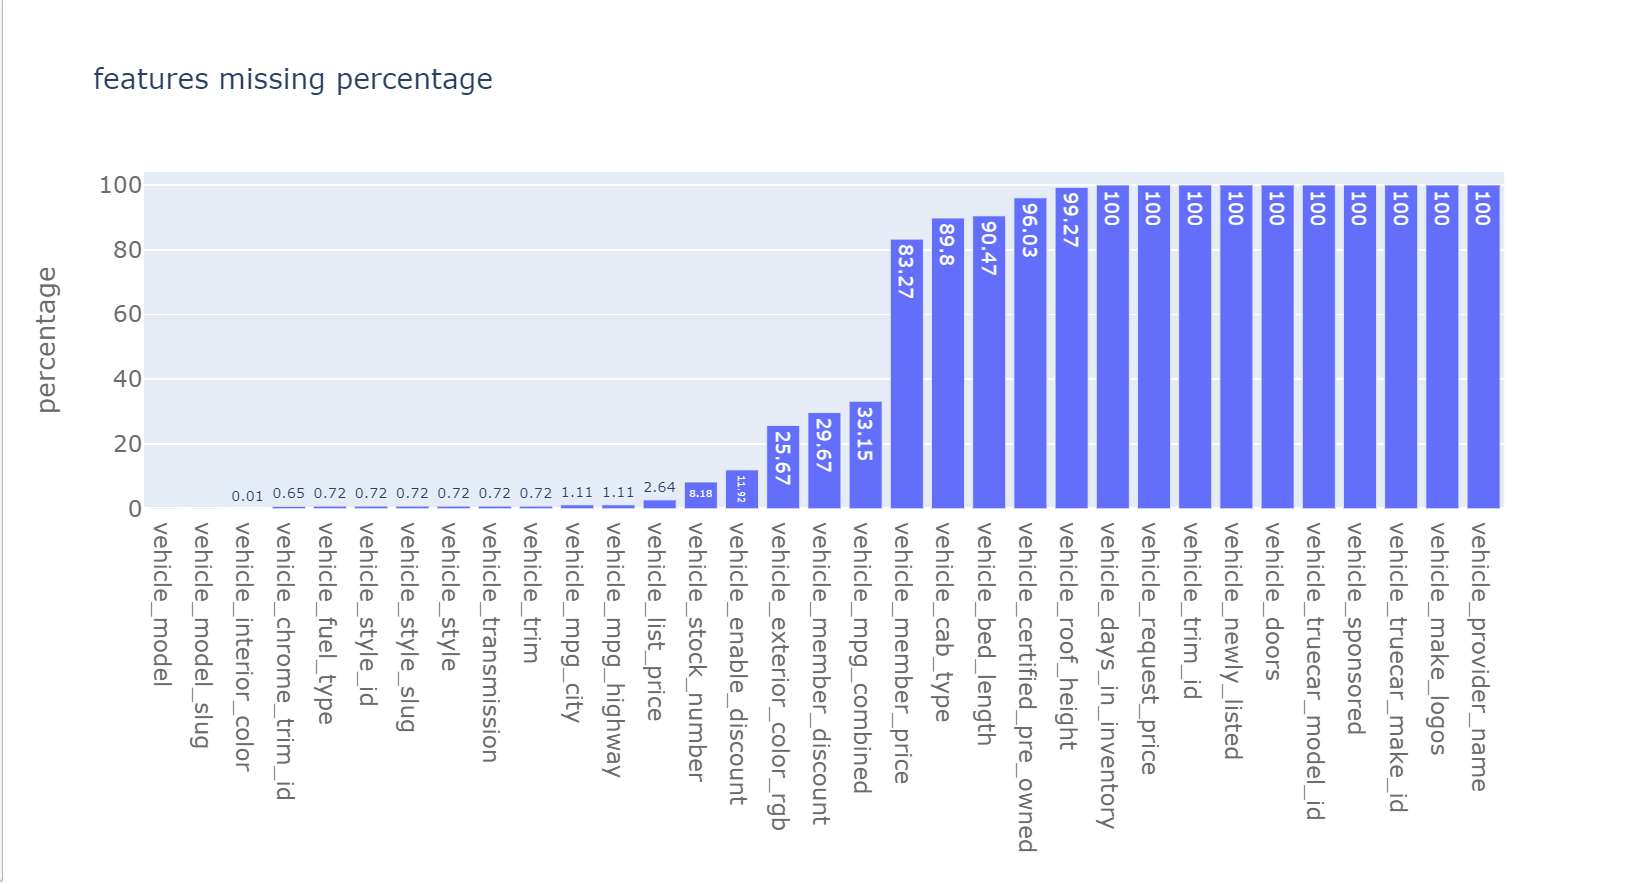

In [89]:
from IPython.display import Image
Image(filename='na_plot.png') 

### Drop missing percentage greater than 50%

In [90]:
column_need = df_na.drop(index = df_na[df_na.percent>50].index.values).features.values

In [91]:
df_need = df_vehicle.loc[:,df_vehicle.columns[df_vehicle.columns.isin(column_need)].values]

### drop other duplicate/useless  features
- some features are image links.
- some features are duplicates of other columns.
- some features are ids that share the same meanings.

In [92]:
df_need.head(2)

,vehicle_body_style_slug,vehicle_body_style,vehicle_drive_train,vehicle_engine,vehicle_fuel_type,vehicle_make_id,vehicle_make_slug,vehicle_make,vehicle_model_id,vehicle_model_slug,vehicle_model,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_style_id,vehicle_style_slug,vehicle_style,vehicle_transmission,vehicle_trim_slug,vehicle_trim,vehicle_year,vehicle_chrome_trim_id,vehicle_carfax_report_available,vehicle_enable_discount,vehicle_exterior_color_generic,vehicle_exterior_color_rgb,vehicle_exterior_color,vehicle_interior_color,vehicle_list_price,vehicle_member_discount,vehicle_mileage,vehicle_new_or_used,vehicle_stock_number,vehicle_vin,vehicle_manufacturer_options,vehicle_multilocation,vehicle_location,vehicle_price_dropped,vehicle_image,vehicle_images
0,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,2020,405609.0,True,no,Gray,515660,Nightfall Grey,Jet Black/Jet Black,10742.0,0.0,598,USED,19C712,KL8CB6SA2LC408625,[],False,"Richardson, TX",False,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...
1,hatchback,Hatchback,FWD,1.4L Inline-4 Gas,Gas,55,chevrolet,Chevrolet,8446,spark,Spark,30.0,33.0,38.0,65120.0,ls-cvt,LS CVT,Automatic,ls,LS CVT,2020,405609.0,True,no,Tan,E1D8D1,Toasted Marshmallow,Jet Black/Jet Black,10991.0,0.0,1004,USED,19C707,KL8CB6SA2LC408396,[],False,"Richardson, TX",False,https://listings-prod.tcimg.net/listings/3185/...,['https://listings-prod.tcimg.net/listings/318...


In [93]:
df_need.drop(['vehicle_image',
'vehicle_images',
'vehicle_manufacturer_options',
"vehicle_body_style",
"vehicle_make",
"vehicle_model",
"vehicle_style",
"vehicle_trim",
"vehicle_stock_number",
"vehicle_vin",
"vehicle_make_id",
"vehicle_model_id",
"vehicle_style_id",
"vehicle_chrome_trim_id"],axis =1 , inplace = True)

### Check the remaining missing values
###  The missing percentage of missing values are trivial except 
- vehicle_enable_discount ~12%
- vehicle_member_discount ~29%
- vehicle_mpg_combined ~32
- vehicle_exterior_color ~25

### Drop NA list price first

In [94]:
na_price_idx = df_need[df_need.vehicle_list_price.isnull()].index.values
df_need.drop(index =na_price_idx, inplace = True)
df_need.reset_index(drop = True,inplace=True)

In [95]:
miss_columns = df_need.columns[df_need.isnull().any()].values

In [96]:
check_missing(df_need[miss_columns],title_="features missing percentage",y_axis='percentage')

,features,percent
0,vehicle_exterior_color,0.00
1,vehicle_interior_color,0.01
2,vehicle_fuel_type,0.73
3,vehicle_style_slug,0.73
4,vehicle_transmission,0.73
5,vehicle_mpg_city,1.13
6,vehicle_mpg_highway,1.13
7,vehicle_enable_discount,12.00
8,vehicle_exterior_color_rgb,24.68
9,vehicle_member_discount,29.19


### Fill "vehicle_enable_discount" with "no"

In [97]:
df_need.vehicle_enable_discount.value_counts()

yes_all_tc    62133
no            52978
yes_member    21536
Name: vehicle_enable_discount, dtype: int64

In [98]:
df_need.vehicle_enable_discount.fillna('no',inplace = True)

### Fill  "vehicle_member_discount" with 0.0

In [99]:
df_need.vehicle_member_discount.fillna(0.0,inplace=True)

### Fill "vehicle_mpg_combined" by weighting the City value by 55% and the Highway value by 45% based on combined fuel economy calculation.

In [100]:
na_mpgcomb_idx = df_need[(df_need.vehicle_mpg_combined.isnull()) &
                        (~df_need.vehicle_mpg_city.isnull()) &
                        (~df_need.vehicle_mpg_highway.isnull())].index.values

In [101]:
df_need.loc[na_mpgcomb_idx,'vehicle_mpg_combined'] = (df_need.loc[na_mpgcomb_idx,'vehicle_mpg_city'] * 0.55 + df_need.loc[na_mpgcomb_idx,'vehicle_mpg_highway'] * 0.45).values

### Fill "vehicle_fuel_type" with "Gas"

In [102]:
df_need.vehicle_fuel_type.value_counts()

Gas         143874
Diesel        5538
Hybrid        3475
Electric       799
Plug-In        420
CNG             23
Hydrogen        16
Name: vehicle_fuel_type, dtype: int64

In [103]:
df_need.vehicle_fuel_type.fillna('Gas',inplace = True)

### Fill "vehicle_transmission" with "Automatic"

In [104]:
df_need.vehicle_transmission.value_counts()

Automatic    142894
Manual        11251
Name: vehicle_transmission, dtype: int64

In [105]:
df_need.vehicle_transmission.fillna('Automatic',inplace = True)

### Fill "vehicle_exterior_color_rgb" with "000000"

In [106]:
df_need.vehicle_exterior_color_rgb.value_counts()

000000    10244
FFFFFF     4362
B3B7B6     1802
BCBCBC     1451
050505     1443
          ...  
757C74        1
AAABA5        1
16254B        1
3A4D60        1
32171D        1
Name: vehicle_exterior_color_rgb, Length: 3607, dtype: int64

In [108]:
df_need.vehicle_exterior_color_rgb.fillna('000000',inplace = True)

In [109]:
df_need.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155281 entries, 0 to 155280
Data columns (total 26 columns):
vehicle_body_style_slug            155281 non-null object
vehicle_drive_train                155281 non-null object
vehicle_engine                     155281 non-null object
vehicle_fuel_type                  155281 non-null object
vehicle_make_slug                  155281 non-null object
vehicle_model_slug                 155281 non-null object
vehicle_mpg_city                   153529 non-null float64
vehicle_mpg_combined               153741 non-null float64
vehicle_mpg_highway                153529 non-null float64
vehicle_style_slug                 154145 non-null object
vehicle_transmission               155281 non-null object
vehicle_trim_slug                  155281 non-null object
vehicle_year                       155281 non-null int64
vehicle_carfax_report_available    155281 non-null object
vehicle_enable_discount            155281 non-null object
vehicle_exterior_

In [110]:
check_missing(df_need[miss_columns],title_="features missing percentage",y_axis='percentage')

,features,percent
0,vehicle_fuel_type,0.00
1,vehicle_transmission,0.00
2,vehicle_enable_discount,0.00
3,vehicle_exterior_color_rgb,0.00
4,vehicle_exterior_color,0.00
5,vehicle_member_discount,0.00
6,vehicle_interior_color,0.01
7,vehicle_style_slug,0.73
8,vehicle_mpg_combined,0.99
9,vehicle_mpg_city,1.13


### Drop the rest of NA values

In [111]:
df_need.dropna(inplace=True)
df_need.reset_index(drop = True, inplace=True)

### No missing now!

In [112]:
df_need.isnull().sum()

vehicle_body_style_slug            0
vehicle_drive_train                0
vehicle_engine                     0
vehicle_fuel_type                  0
vehicle_make_slug                  0
vehicle_model_slug                 0
vehicle_mpg_city                   0
vehicle_mpg_combined               0
vehicle_mpg_highway                0
vehicle_style_slug                 0
vehicle_transmission               0
vehicle_trim_slug                  0
vehicle_year                       0
vehicle_carfax_report_available    0
vehicle_enable_discount            0
vehicle_exterior_color_generic     0
vehicle_exterior_color_rgb         0
vehicle_exterior_color             0
vehicle_interior_color             0
vehicle_list_price                 0
vehicle_member_discount            0
vehicle_mileage                    0
vehicle_new_or_used                0
vehicle_multilocation              0
vehicle_location                   0
vehicle_price_dropped              0
dtype: int64

In [113]:
new_col_name = [col.replace("_slug","") for col in df_need.columns.values]

In [114]:
df_need.rename(columns=dict(zip(df_need.columns.values,new_col_name)),inplace=True)

In [115]:
df_need.shape

(153510, 26)

## Check outliers

In [116]:
df_need.select_dtypes(exclude='object').describe()

,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_year,vehicle_list_price,vehicle_member_discount,vehicle_mileage
count,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000,153510.000000
mean,21.539822,24.248447,28.603225,2011.556146,12390.828845,66.238323,84672.781825
std,10.490108,10.091848,10.111081,5.243703,10826.932624,115.267328,55493.100502
min,0.000000,0.000000,0.000000,1997.000000,1500.000000,-250.000000,5.000000
25%,17.000000,19.600000,24.000000,2008.000000,6999.000000,0.000000,39468.000000
50%,21.000000,24.000000,28.000000,2012.000000,10495.000000,0.000000,80623.500000
75%,25.000000,29.000000,35.000000,2016.000000,13995.000000,100.000000,119989.750000
max,137.000000,124.000000,111.000000,2020.000000,499999.000000,1500.000000,489839.000000


## Check outliers

- Constrain vehicle_mpg_city between 0 and 38
- Constrain vehicle_mileage less than or equal 235000
- Constrain vehicle_list_price less than or equal 22500

### vehicle_mpg_city

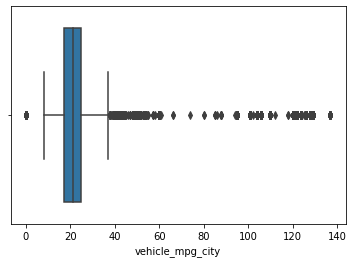

In [117]:
sns.boxplot(df_need.vehicle_mpg_city)
plt.show()

### vehicle_mileage



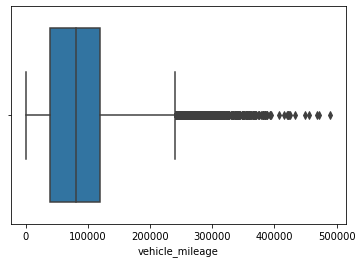

In [118]:
sns.boxplot(df_need.vehicle_mileage)
plt.show()


###  vehicle_list_price



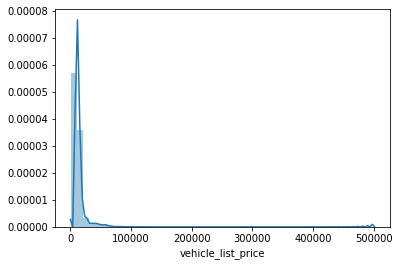

In [119]:
sns.distplot(df_need.vehicle_list_price)
plt.show()

### Remove outliers and check again


In [120]:
df_new = df_need[(df_need.vehicle_mpg_city>0)&(df_need.vehicle_mpg_city<38)]
df_new = df_new[df_new.vehicle_mileage<=234500]
df_new = df_new[df_new.vehicle_list_price<=22500]

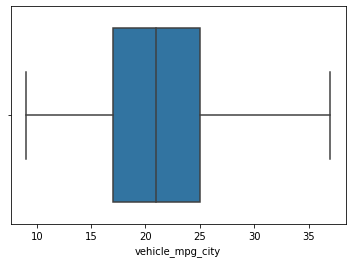

In [121]:
sns.boxplot(df_new.vehicle_mpg_city)
plt.show()

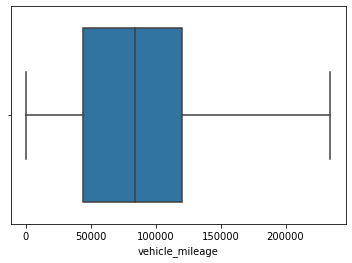

In [122]:
sns.boxplot(df_new.vehicle_mileage)
plt.show()

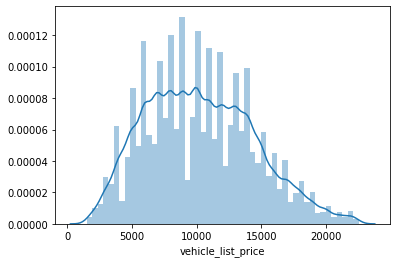

In [123]:
sns.distplot(df_new.vehicle_list_price)
plt.show()

### Found 17 negative vehicle_member_discount
- Replace them with 0

In [124]:
df_new[df_new.vehicle_member_discount<0].shape[0]

17

In [125]:
neg_md_idx = df_new[df_new.vehicle_member_discount<0].index.values

In [126]:
df_new.loc[neg_md_idx,'vehicle_member_discount'] = 0

### Looks no problem :)


In [127]:
df_new.select_dtypes(exclude='object').describe()

,vehicle_mpg_city,vehicle_mpg_combined,vehicle_mpg_highway,vehicle_year,vehicle_list_price,vehicle_member_discount,vehicle_mileage
count,134451.000000,134451.000000,134451.000000,134451.000000,134451.000000,134451.000000,134451.000000
mean,21.410187,24.391468,29.142119,2011.396018,10273.470008,62.883618,86147.712230
std,5.023756,5.567647,6.466858,4.974376,4189.932737,108.858339,49952.254423
min,9.000000,0.000000,0.000000,1997.000000,1500.000000,0.000000,5.000000
25%,17.000000,20.000000,24.000000,2008.000000,6995.000000,0.000000,43787.500000
50%,21.000000,24.000000,29.000000,2012.000000,9995.000000,0.000000,83775.000000
75%,25.000000,29.000000,35.000000,2016.000000,13167.500000,100.000000,120081.500000
max,37.000000,40.000000,47.000000,2020.000000,22500.000000,1000.000000,234499.000000


In [128]:
df_new.shape

(134451, 26)

In [130]:
df_new.to_csv('processed.csv',index= False)